In [1]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
import torch.nn as nn
import torch.optim
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import neuralnets as mynn
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score
import seaborn as sn

torch.manual_seed(5)


def data_load():
    
    features = pd.read_csv('exoplanets_features.csv', header=None).values[1:]
    label = pd.read_csv('exoplanets_label.csv').values

    features = minmax_scale(features)

    x_train, x_test_validation, y_train, y_test_validation = train_test_split(features, label, random_state=1, test_size=0.3)

    x_test, x_validation, y_test, y_validation = train_test_split(x_test_validation, y_test_validation, test_size=0.5,
                                                                  random_state=1)

    x_train_tensor = torch.tensor(x_train, dtype=torch.float)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float)
    x_validation_tensor = torch.tensor(x_validation, dtype=torch.float)
    y_validation_tensor = torch.tensor(y_validation, dtype=torch.float)
    x_test_tensor = torch.tensor(x_test, dtype=torch.float)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float)

    dataset_train = TensorDataset(x_train_tensor, y_train_tensor)
    dataset_validation = TensorDataset(x_validation_tensor, y_validation_tensor)

    train_loader = DataLoader(dataset=dataset_train, batch_size=x_train.shape[0])
    val_loader = DataLoader(dataset=dataset_validation, batch_size=x_validation.shape[0])

    test_tuple = (x_test_tensor, y_test_tensor)

    return train_loader, val_loader, test_tuple


def data_loader_review():

    features = pd.read_csv('exoplanets_features.csv', header=None).values[1:]
    label = pd.read_csv('exoplanets_label.csv').values

    features = minmax_scale(features)

    x_train, x_test, y_train, y_test = train_test_split(features, label, random_state=1, test_size=0.3)

    x_train_tensor = torch.tensor(x_train, dtype=torch.float)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float)

    x_test_tensor = torch.tensor(x_test, dtype=torch.float)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float)

    dataset_train = TensorDataset(x_train_tensor, y_train_tensor)

    train_loader = DataLoader(dataset=dataset_train, batch_size=x_train.shape[0])

    test_tuple = (x_test_tensor, y_test_tensor)

    return


def training(model_, train_loader, val_loader, epochs=100, lr=0.01, loss_function=nn.MSELoss()):
    train_track = []
    validation_track = []

    optimizer = torch.optim.Adam(model_.parameters(), lr=lr)

    for epoch in range(epochs):

        for x_batch, y_batch in train_loader:

            optimizer.zero_grad()
            output = model_(x_batch)
            loss = loss_function(output, y_batch)
            loss.backward()
            optimizer.step()
            model_.train()
            train_track.append(loss.item())

            with torch.no_grad():
                for x_val, y_val in val_loader:
                    y_out = model_(x_val)
                    val_loss = loss_function(y_val, y_out)

                    validation_track.append(val_loss.item())

    return model_, train_track, validation_track


def loss_graph(name, train_track, val_track):
    plt.figure(figsize=(9, 5))
    plt.title(name)
    plt.grid(True)

    plt.plot(train_track, label='Train Set Score', color='g')
    plt.legend(loc="best")
    plt.plot(val_track, label='Validation Set Score', color='r')
    plt.legend(loc="best")

    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')

    #plt.savefig('experiments/' + name + '.png')
    plt.close()

    plt.figure(figsize=(9, 5))
    plt.title(name)
    plt.grid(True)

    plt.loglog(train_track, label='Train set score', color='g')
    plt.legend(loc="best")
    plt.loglog(val_track, label='Validation Set Score', color='r')
    plt.legend(loc="best")

    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')

    #plt.savefig('experiments/' + name + '_log.png')
    plt.close()


def evaluation(y_true, y_pred):
    # Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_true, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_true, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_true, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_true, y_pred)))

    # Print Confusion Matrix
    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_true, y_pred).ravel())
    return confusion_matrix(y_true, y_pred).ravel()


def evaluate_matrix_graph(name, y_true, y_pred):
    e = evaluation(y_true, y_pred)

    binary_matrix = np.array([e[:2], e[2:]])

    fig, ax = plot_confusion_matrix(conf_mat=binary_matrix)
    #plt.savefig('ACTION' + name + '_evaluate_matrix.png')


In [2]:
import torch.nn as nn
class NN3HiddenLayer(nn.Module):

    def __init__(self, act_function=nn.Sigmoid(), input_size=37):
        super(NN3HiddenLayer, self).__init__()

        self.input_size = input_size
        self.output_size = 1

        self.act_function = act_function

        self.input = nn.Linear(self.input_size, 20)
        self.hl1 = act_function
        self.linear_hl2 = nn.Linear(20, 10)
        self.hl2 = act_function
        self.linear_hl3 = nn.Linear(10, 5)
        self.hl3 = act_function
        self.linear_hl4 = nn.Linear(5, self.output_size)
        self.output = nn.Sigmoid()
        
    def forward(self, x):

            x = self.input(x)
            x = self.hl1(x)
            x = self.linear_hl2(x)
            x = self.hl2(x)
            x = self.linear_hl3(x)
            x = self.hl3(x)
            x = self.linear_hl4(x)
            return self.output(x)

Evaluation Metrics:
Accuracy: 0.9572649572649573
Recall: 0.9511400651465798
Precision: 0.9668874172185431
F1 Score: 0.9589490968801314

Confusion Matrix:
 TN,  FP, FN, TP
[536  20  30 584]
Evaluation Metrics:
Accuracy: 0.9572649572649573
Recall: 0.9511400651465798
Precision: 0.9668874172185431
F1 Score: 0.9589490968801314

Confusion Matrix:
 TN,  FP, FN, TP
[536  20  30 584]


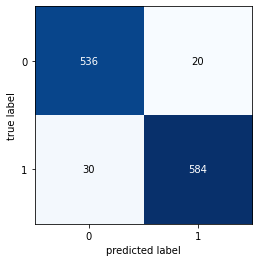

In [3]:
import torch
import torch.nn as nn
#from neuralnets import NN3HiddenLayer

model = NN3HiddenLayer()

train_loader, val_loader, test_tuple = data_load()

model, train_track, validation_track = training(model, train_loader, val_loader, epochs=100, lr=0.01, loss_function=nn.MSELoss())

# Plot the loss graph
loss_graph('Perceptron', train_track, validation_track)

# Evaluate the model
x_test, y_test = test_tuple
y_pred = (model(x_test) > 0.5).float() # apply a threshold to get class labels
y_true = y_test.detach().numpy()  # do the same for the true labels

# Print the evaluation metrics and confusion matrix
evaluation(y_true, y_pred.detach().numpy())

# Plot the confusion matrix graph
evaluate_matrix_graph('Perceptron', y_true, y_pred.detach().numpy())

In [13]:
torch.save(model.state_dict(), 'trained_model_ANN.pth')

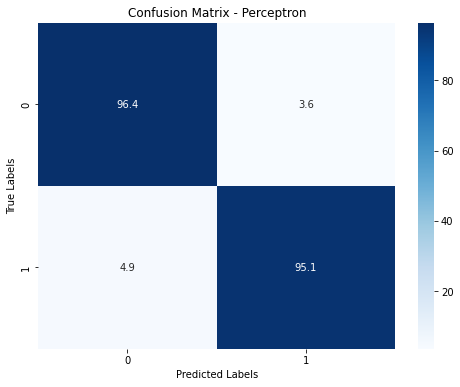

In [5]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure(figsize=(8, 6))
    sn.heatmap(cm_percent, annot=True, fmt=".1f", cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

plot_confusion_matrix(y_true, y_pred, title='Perceptron')